In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [59]:
metrics = [
  "Memory used",
  "Program time",
  "Bind time",
  "Check time",
  "Emit time",
  "Total time",
]

def read_diagnose_file(p: str):
  df = pd.DataFrame(columns=metrics)
  
  with open(p) as f:
    lines = f.readlines()
    for line in lines:

      header = line.split(":")[0].strip()
      value = line.split(":")[1].strip()

      if(header in metrics):
        df.loc[0, header] = int(re.sub("\D", "", value))
  
  [schema, name, extension] = p.split(".")

  name = "-".join(name.split("-")[0:-1])

  df.loc[0, "Type"] = os.path.basename(schema)
  df.loc[0, "Name"] = os.path.basename(name)
  df.loc[0, "Path"] = os.path.basename(p)
  return df


def list_benchmark_files():
  cwd = os.getcwd()
  rootPath = os.path.dirname(os.path.dirname(cwd))
  benchmarkPath = os.path.join(rootPath, "data/__benchmark__/")
  files = os.listdir(benchmarkPath)
  filePaths = [benchmarkPath + file for file in files]
  return filePaths

def build_pandas_dataframe():
  df = pd.DataFrame(columns=metrics)
  for file in list_benchmark_files():
    df = pd.concat([df, read_diagnose_file(file)], ignore_index=True)
  return df

df = build_pandas_dataframe()

print(df)

    Memory used Program time Bind time Check time Emit time Total time  \
0         96932           72        27         18         0        117   
1        161858           81        32         35         0        147   
2         95957           65        24         10         0         99   
3        108678           53        22         25         0         99   
4        104501           63        20         24         0        106   
..          ...          ...       ...        ...       ...        ...   
135      113982           64        22          7         0         94   
136       97334           61        22         21         0        105   
137      114076           61        24          7         0         93   
138       87203           60        24          5         0         89   
139      153304           94        32         26         0        152   

           Type         Name                          Path  
0       valibot     1-simple        valibot.1-simp

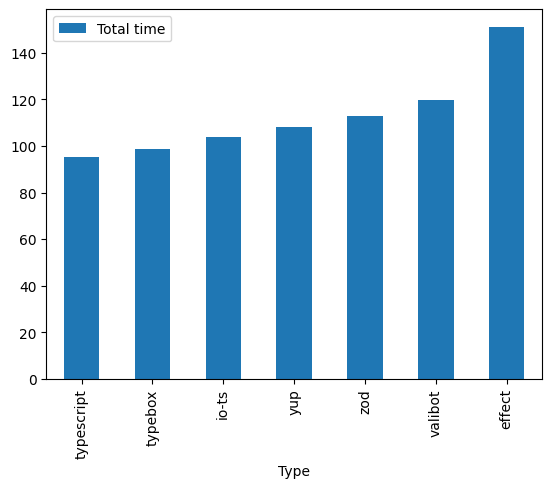

In [74]:
df.groupby("Type")[["Total time"]].mean().sort_values("Total time").plot(kind="bar")
print("")

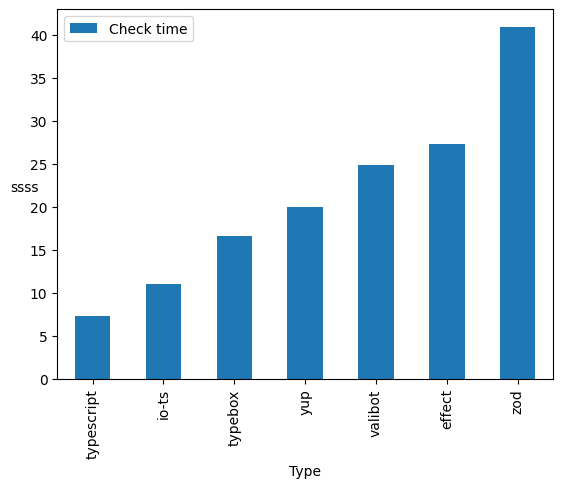

In [77]:
df.groupby("Type")[["Check time"]].mean().sort_values("Check time").plot(kind="bar")
plt.ylabel("Seconds", rotation=0)
print("")